## Titanic

In [14]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [15]:
df_train = pd.read_csv('train.csv', sep=',')

In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_train.shape

(891, 12)

In [18]:
df_train.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [28]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [19]:
df_train.corr().round(4)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0000,-0.0050,-0.0351,0.0368,-0.0575,-0.0017,0.0127
Survived,-0.0050,1.0000,-0.3385,-0.0772,-0.0353,0.0816,0.2573
Pclass,-0.0351,-0.3385,1.0000,-0.3692,0.0831,0.0184,-0.5495
Age,0.0368,-0.0772,-0.3692,1.0000,-0.3082,-0.1891,0.0961
SibSp,-0.0575,-0.0353,0.0831,-0.3082,1.0000,0.4148,0.1597
Parch,-0.0017,0.0816,0.0184,-0.1891,0.4148,1.0000,0.2162
Fare,0.0127,0.2573,-0.5495,0.0961,0.1597,0.2162,1.0000


In [30]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [31]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [33]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


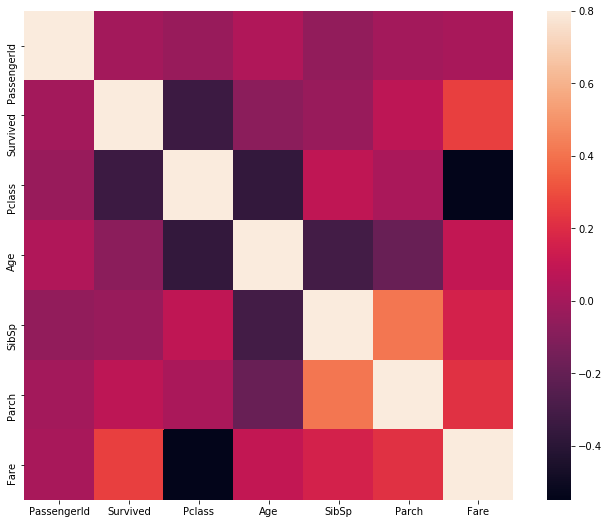

In [20]:
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

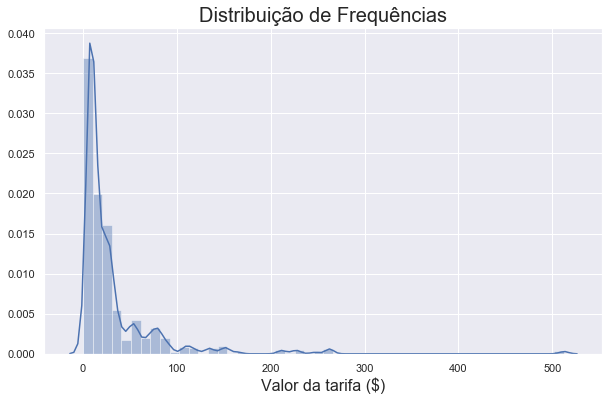

In [24]:
f_fare = sns.distplot(dados['Fare'])
f_fare.figure.set_size_inches(10, 6)
f_fare.set_title('Distribuição de Frequências', fontsize=20)
f_fare.set_xlabel('Valor da tarifa ($)', fontsize=16)
f_fare

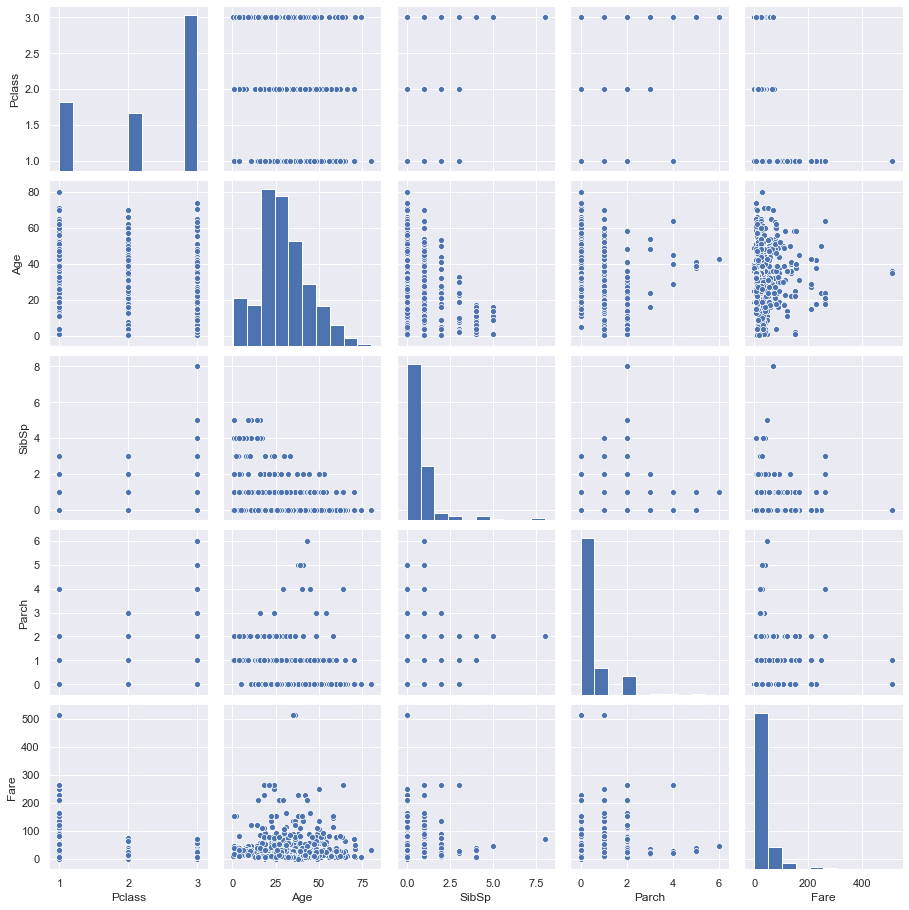

In [25]:
sns.set()
cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
sns.pairplot(df_train[cols], size = 2.5)
#plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


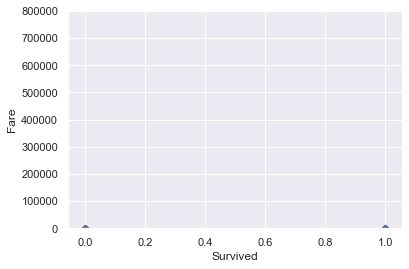

In [26]:
var = 'Survived'
data = pd.concat([df_train['Fare'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='Fare', ylim=(0,800000));